## Inicialización

In [ ]:
# Importar librerías
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.dummy import DummyClassifier
import re
import nltk
from nltk.corpus import stopwords
from tqdm.auto import tqdm

import warnings
warnings.filterwarnings("ignore")

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# Gráficos de mejor calidad en pantallas HiDPI
# %config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [ ]:
# Uso de progress_apply, info en https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Cargar datos

In [ ]:
# Cargar datos
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [ ]:
# Checar duplicados
df_reviews.duplicated().sum()

0

In [ ]:
# Info del df
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

In [7]:
df_reviews.head(10)

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281
5,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,This is the first movie I've seen from Singapo...,9,pos,1,test,9282
6,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Yes non-Singaporean's can't see what's the big...,9,pos,1,test,9283
7,tt0035958,movie,'Gung Ho!': The Story of Carlson's Makin Islan...,'Gung Ho!': The Story of Carlson's Makin Islan...,1943,\N,88,0,"Drama,History,War",6.1,1240,This true story of Carlson's Raiders is more o...,2,neg,0,train,9903
8,tt0035958,movie,'Gung Ho!': The Story of Carlson's Makin Islan...,'Gung Ho!': The Story of Carlson's Makin Islan...,1943,\N,88,0,"Drama,History,War",6.1,1240,Should have been titled 'Balderdash!' Little i...,2,neg,0,train,9905
9,tt0035958,movie,'Gung Ho!': The Story of Carlson's Makin Islan...,'Gung Ho!': The Story of Carlson's Makin Islan...,1943,\N,88,0,"Drama,History,War",6.1,1240,The movie 'Gung Ho!': The Story of Carlson's M...,4,neg,0,train,9904


In [ ]:
# Eliminar NaN de average_rating y votes
df_reviews = df_reviews.dropna(subset=['average_rating', 'votes'])
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47329 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47329 non-null  object 
 1   title_type       47329 non-null  object 
 2   primary_title    47329 non-null  object 
 3   original_title   47329 non-null  object 
 4   start_year       47329 non-null  int64  
 5   end_year         47329 non-null  object 
 6   runtime_minutes  47329 non-null  object 
 7   is_adult         47329 non-null  int64  
 8   genres           47329 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47329 non-null  object 
 12  rating           47329 non-null  int64  
 13  sp               47329 non-null  object 
 14  pos              47329 non-null  int64  
 15  ds_part          47329 non-null  object 
 16  idx              47329 non-null  int64  
dtypes: Int64(1),

## EDA

Veamos el número de películas y reseñas a lo largo de los años.

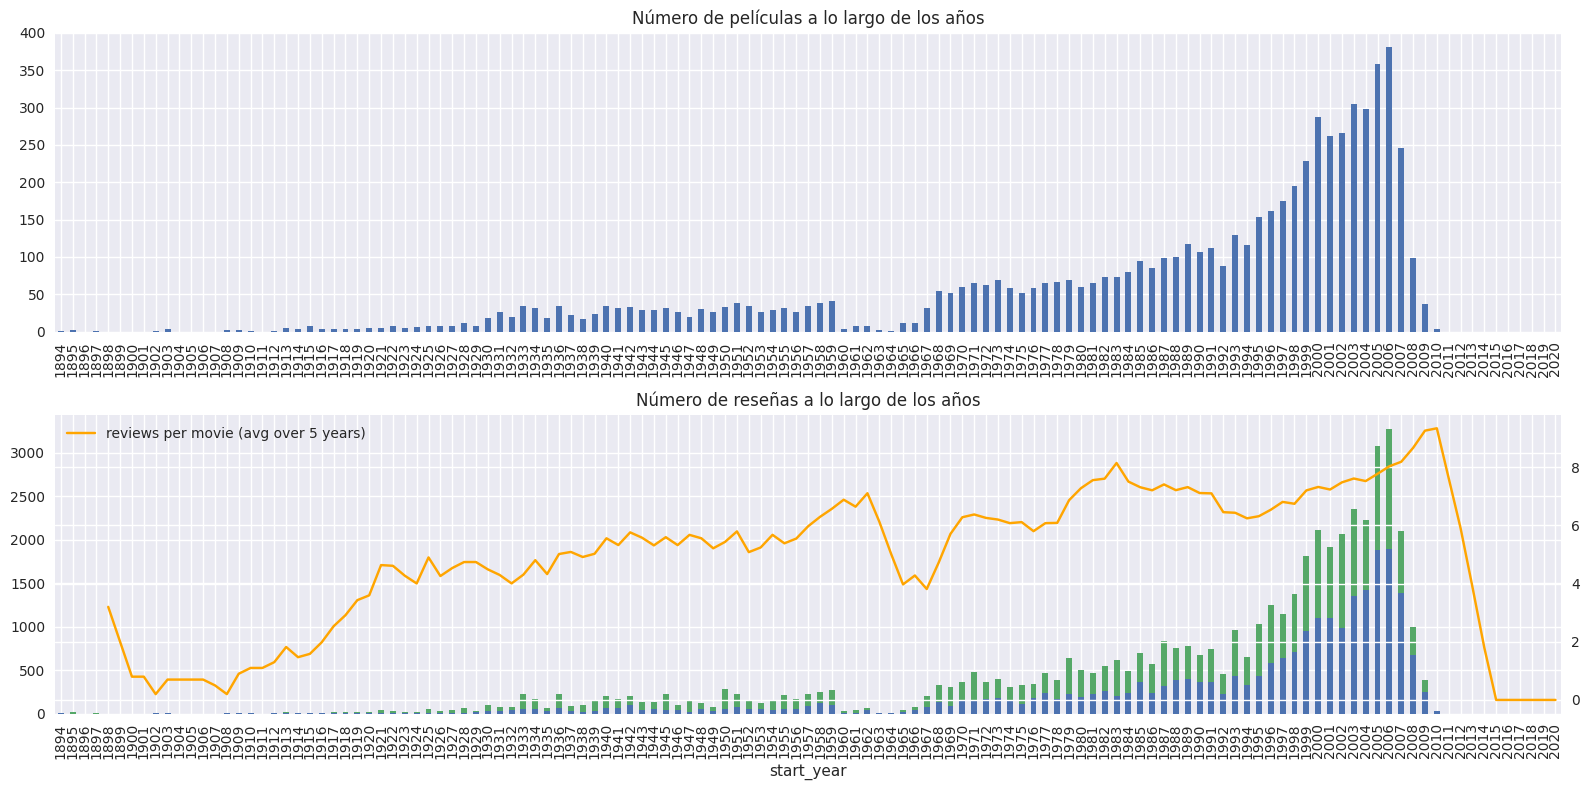

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Número de películas a lo largo de los años')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Número de reseñas a lo largo de los años')

fig.tight_layout()

In [10]:
print(df_reviews.query('start_year>2009')['rating'].count())

27


Conclusiones:
1. De 1910 a 2006, el número de películas incrementó exponencialmente. Después de 2010, cae abruptamente, probablemente debido a que los datos de esos años están incompletos o desactualizados.
2. El número total de reseñas sigue una tendencia similar al número de películas, con un pico entre 2005 y 2010. Las barras verdes y azules indican la proporción entre reseñas positivas y negativas por año. Hay muchas más reseñas positivas. La línea naranja (promedio de reseñas por película) se mantiene estable entre 1970 y 2005 (~6–8 reseñas por película). Después de 2010, la línea cae a cero: otra vez, esto puede deberse a datos incompletos (películas recientes sin reseñas aún). También, podemos ver el crecimiento del internet en general. Según una investigación que hice, el internet tal y como lo conocemos empezó en la década de los 60. A partir de ahí se observa el crecimiento de reseñas en IMDb.
3. De los 47,329 registros que existen, únicamente existen 27 registros después de 2009, lo que confirma que los datos no están actualizados. 

Veamos la distribución del número de reseñas por película con el conteo exacto y KDE (solo para saber cómo puede diferir del conteo exacto)

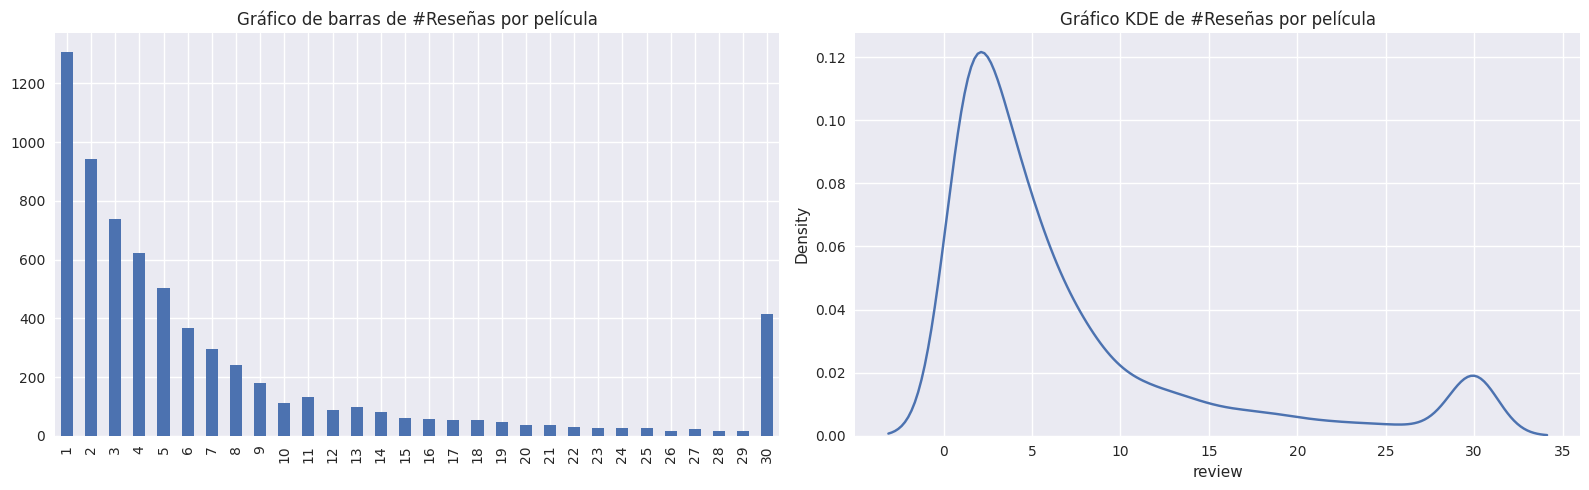

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Gráfico de barras de #Reseñas por película')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('Gráfico KDE de #Reseñas por película')

fig.tight_layout()

Conclusiones: Prácticamente los dos gráficos se ven iguales y nos dicen lo mismo. La gran mayoría de películas tiene entre 1 y 3 reseñas. Conforme aumentan las reseñas, disminuye el número de películas. Sin embargo, hay algo llamativo, ambos gráficos presentan un repunte en las 30 reseñas, este pequeño grupo se refiere a las películas más populares y taquilleras, que rompen récord de vistas y ventas. 

In [12]:
df_reviews['pos'].value_counts()

0    23715
1    23614
Name: pos, dtype: int64

Hay casi la misma cantidad de observaciones en ambas clases (positiva y negativa), con una diferencia de solo 101 ejemplos. Esto es ideal para modelos de clasificación binaria, ya que no se necesita aplicar técnicas de balanceo (como sobremuestreo o submuestreo).

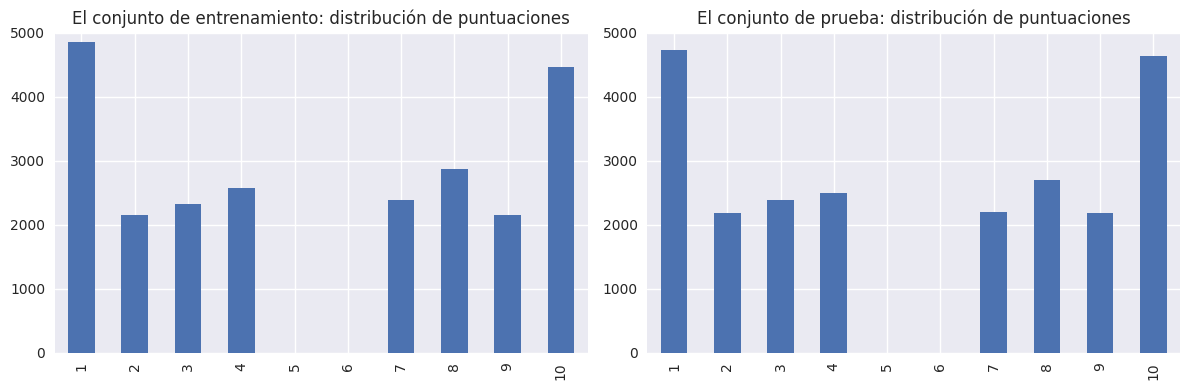

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de entrenamiento: distribución de puntuaciones')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de prueba: distribución de puntuaciones')

fig.tight_layout()

Conclusiones:
- Ambos conjuntos tienen una distribución bastante similar, lo cual es excelente para validación. Esto sugiere que la partición en entrenamiento y prueba se hizo correctamente (probablemente de forma estratificada o aleatoria representativa).
- El número 1 y 10 son las puntuaciones más comunes en ambos conjuntos. Esto sugiere una distribución bimodal: usuarios que aman (10) o detestan (1) las películas muy polarizada.
- Hay un descenso notable en puntuaciones medias, especialmente entre 5 y 7.

Distribución de reseñas negativas y positivas a lo largo de los años para dos partes del conjunto de datos

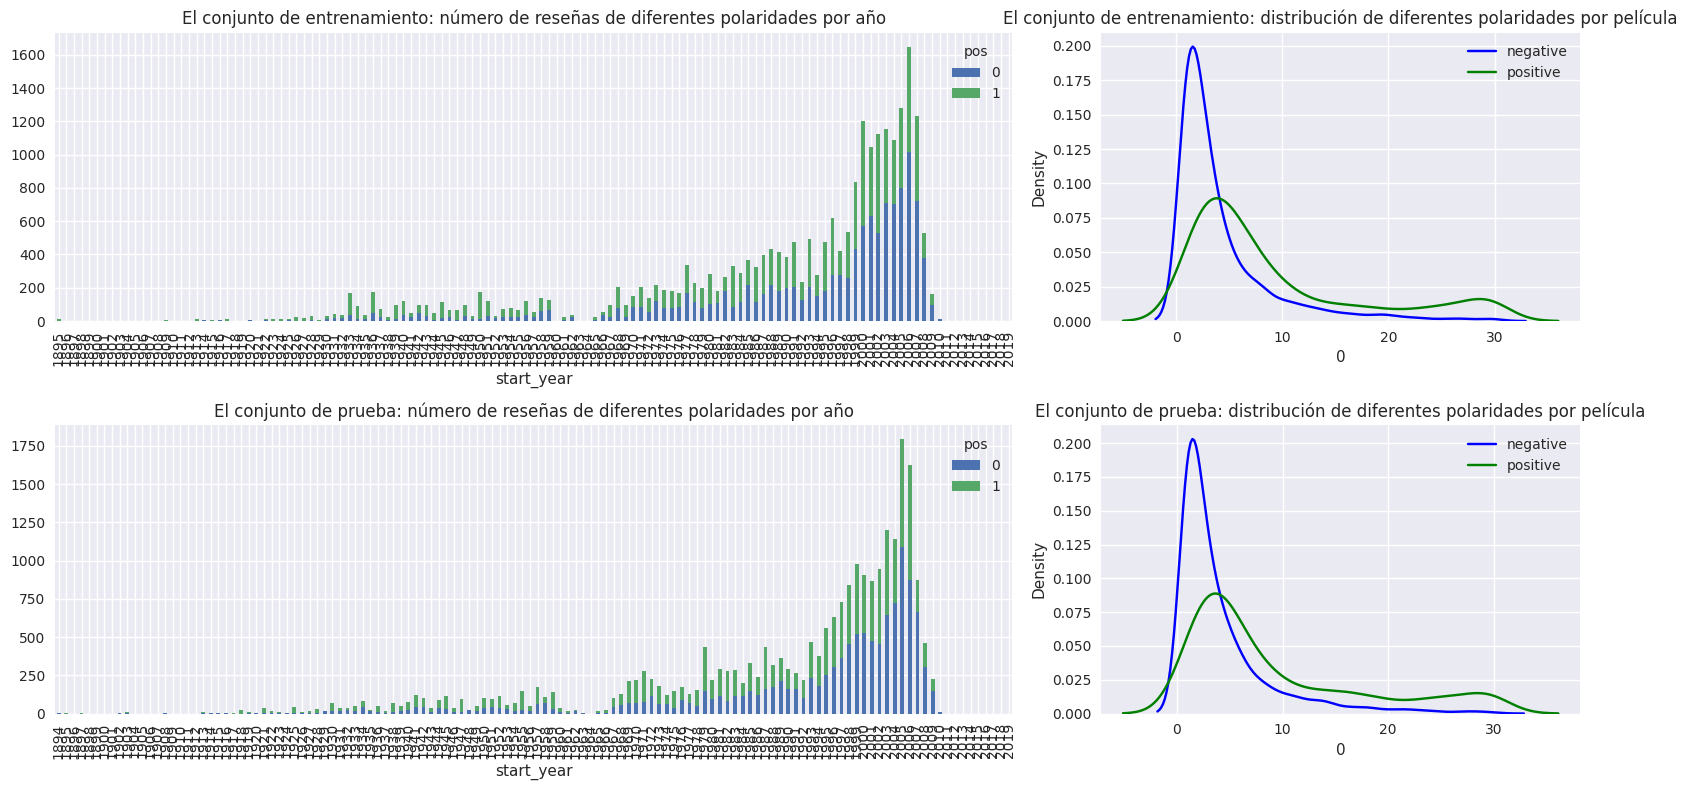

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de entrenamiento: número de reseñas de diferentes polaridades por año')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de entrenamiento: distribución de diferentes polaridades por película')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de prueba: número de reseñas de diferentes polaridades por año')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de prueba: distribución de diferentes polaridades por película')

fig.tight_layout()

Llama la atención las gráficas de la derecha: la curva negativa tiene el pico muy alto cerca de la posición cero, lo cual indica que hay muchas más películas con pocas reseñas negativas. Asímismo, hay películas que tienen muchas reseñas positivas, se trata de grandes éxitos que gustaron mucho. 

## Procedimiento de evaluación

Composición de una rutina de evaluación que se pueda usar para todos los modelos en este proyecto

In [15]:
import sklearn.metrics as metrics
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'Curva ROC')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

## Normalización

Suponemos que todos los modelos a continuación aceptan textos en minúsculas y sin dígitos, signos de puntuación, etc.

In [16]:
# Descargar las palabras vacías (stopwords)
nltk.download('stopwords')

# Crear el conjunto de stopwords en ingles
stop_words = set(stopwords.words('english'))

# Función para limpiar el texto
def clean_text(text): 
    cleaned_text = re.sub(r'<[^>]+>', '', text) # eliminar etiquetas HTML
    cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text) # eliminar caracteres inncesarios
    cleaned_text = cleaned_text.lower() # Convertir a minúsculas
    words = cleaned_text.split() # Tokenizar (dividir en palabras)
    words = [word for word in words if word not in stop_words] # eliminar las stopwords
    cleaned_text = ' '.join(words) # Unir las palabras nuevamente en un solo texto
    return cleaned_text

# Aplicar la limpieza a la columna 'review_norm'
df_reviews['review_norm'] = df_reviews['review'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# Probar la función para limpiar el texto
print('Antes:', df_reviews['review'][0])
print()
print('Después:', df_reviews['review_norm'][0])

Antes: The pakage implies that Warren Beatty and Goldie Hawn are pulling off a huge bank robbery, but that's not what I got out of it! I didn't get anything! In the first half there's a new character (without introduction) in every other scene. The first half-hour is completely incomprehensible, the rest is just one long, annoying, underlit chase scene. There's always an irritating sound in the background whether it's a loud watch ticking, a blaring siren, a train whistling, or even the horrible score by Quincy Jones. There are a lot of parts that are laughably bad, too. Like, the bad guys chasing Beatty on thin ice with a CAR! Or, the police arriving at the scene roughly fifteen times. I really hated this movie!

Después: pakage implies warren beatty goldie hawn pulling huge bank robbery thats got didnt get anything first half theres new character without introduction every scene first halfhour completely incomprehensible rest one long annoying underlit chase scene theres always irrit

Se puede observar que la función está funcionando correctamente. Eliminó las stopwords y otros caracteres. El párrafo se redujo de casi cuatro líneas a casi tres, es significativo.

## División entrenamiento / prueba

In [18]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23533, 18)


## Trabajar con modelos

### Modelo 0 - Constante

In [19]:
from sklearn.dummy import DummyClassifier

          train  test
Accuracy   0.50  0.50
F1         0.67  0.67
APS        0.50  0.50
ROC AUC    0.50  0.50


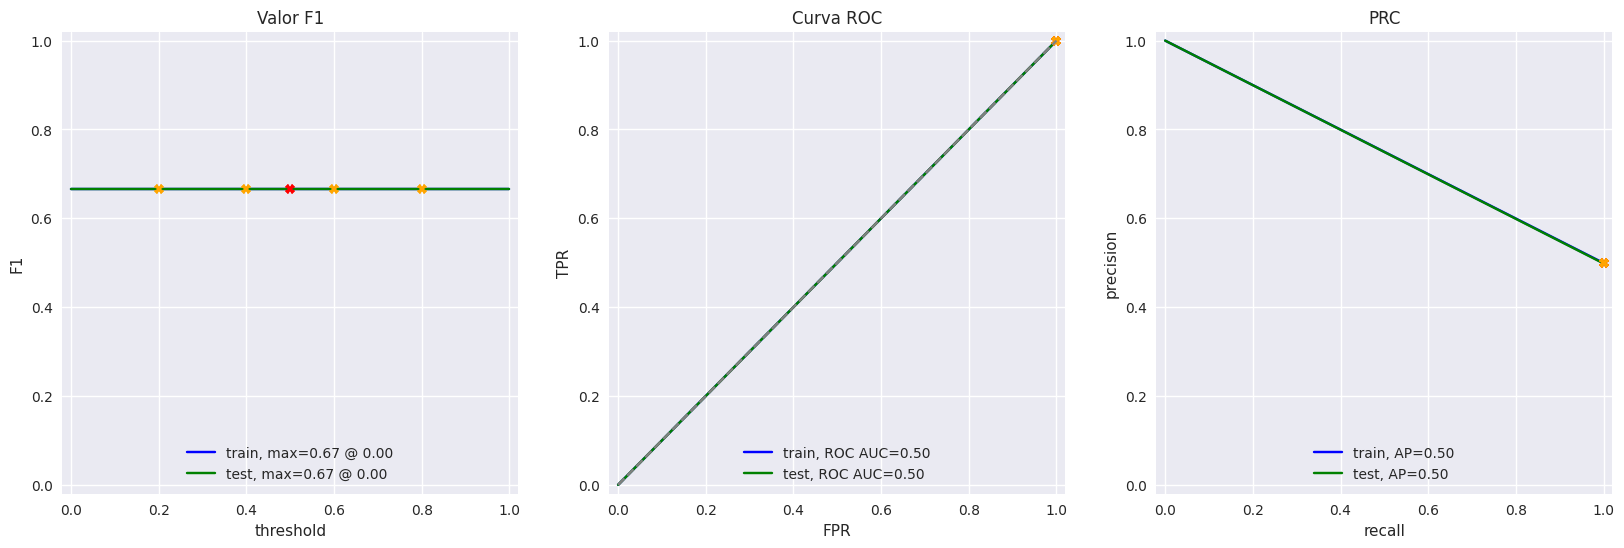

In [20]:
# Modelo 0: DummyClassifier (modelo constante)
dummy = DummyClassifier(strategy='constant', constant=1)

# Entrenamiento
dummy.fit(df_reviews_train['review_norm'], train_target)

# Evaluación con la función personalizada
evaluate_model(dummy, df_reviews_train['review_norm'], train_target, df_reviews_test['review_norm'], test_target)

Este es un modelo Dummy, solo sirve para saber si los otros modelos que aprenden, son mejores y funcionan.

### Modelo 1 - NLTK, TF-IDF y LR

TF-IDF

In [21]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords

In [22]:
# Descargar los recursos necesarios de NLTK (ya estaba descargada, pero para mayor claridad lo hice de nuevo)
nltk.download('stopwords')

# Crear una lista de stopwords
stop_words = stopwords.words('english')

# Crear un objeto TfidfVectorizer 
vectorizer = TfidfVectorizer(lowercase=True, stop_words=stop_words)

# Aplicar el vectorizador a los conjuntos de entrenamiento y prueba
train_features_1 = vectorizer.fit_transform(df_reviews_train['review_norm'])
test_features_1 = vectorizer.transform(df_reviews_test['review_norm'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
# Modelo 1 - NLTK, TF-IDF y LR
model_1 = LogisticRegression()

# Entrenamiento
model_1.fit(train_features_1,train_target)

LogisticRegression()

          train  test
Accuracy   0.94  0.88
F1         0.94  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


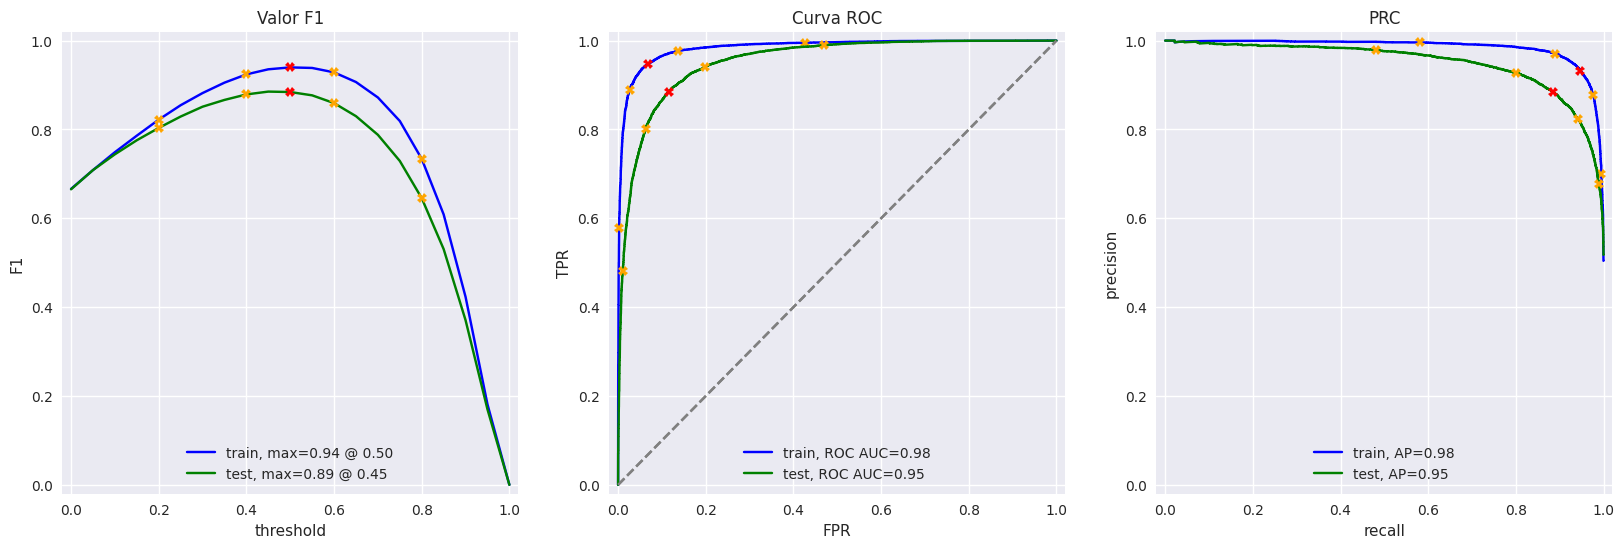

In [24]:
# Evaluación con la función personalizada
evaluate_model(model_1, train_features_1, train_target, test_features_1, test_target)

El F1 es superior al de 0.85, que es el mínimo requerido. A pesar de que el F1 baja 0.06 del train al test, no es un overfitting muy severo, el modelo generaliza bien. 

### Modelo 3 - spaCy, TF-IDF y LR

In [25]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [26]:
def text_preprocessing_3(text):
    
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    
    return ' '.join(tokens)

          train  test
Accuracy   0.93  0.88
F1         0.93  0.88
APS        0.98  0.94
ROC AUC    0.98  0.95


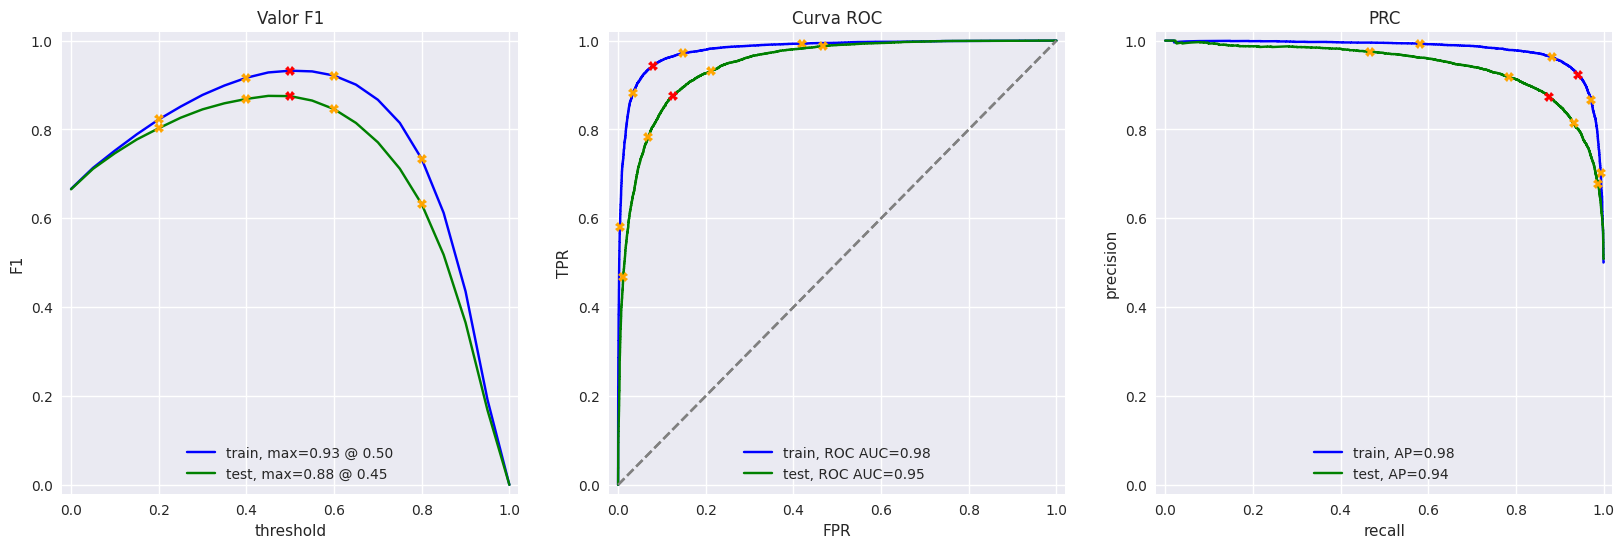

In [27]:
# Aplicar preprocesamiento a los textos
df_reviews_train['review_norm_3'] = df_reviews_train['review'].apply(text_preprocessing_3)
df_reviews_test['review_norm_3'] = df_reviews_test['review'].apply(text_preprocessing_3)

# Vectorización TF-IDF
vectorizer_3 = TfidfVectorizer()
train_features_3 = vectorizer_3.fit_transform(df_reviews_train['review_norm_3'])
test_features_3 = vectorizer_3.transform(df_reviews_test['review_norm_3'])

# Entrenar modelo
model_3 = LogisticRegression()
model_3.fit(train_features_3, train_target)

# Evaluación usando tu función
evaluate_model(model_3, train_features_3, train_target, test_features_3, test_target)

De igual manera, este modelo 3 cumple con el F1 mínimo requerido. En este caso, el F1 es de 0.93, 0.01 menos que el del modelo 1 en la parte de train, pero generaliza correctamente, ya que en la parte de test se obtiene igualmente un F1 de 0.88. Ambos rinden bien, la diferencia es que este modelo con spacy tarda más por su análisis detallado. NLTK es más rápido pero más simple. 

### Modelo 4 - spaCy, TF-IDF y LGBMClassifier

In [28]:
from lightgbm import LGBMClassifier

          train  test
Accuracy   0.91  0.85
F1         0.91  0.85
APS        0.97  0.93
ROC AUC    0.97  0.93


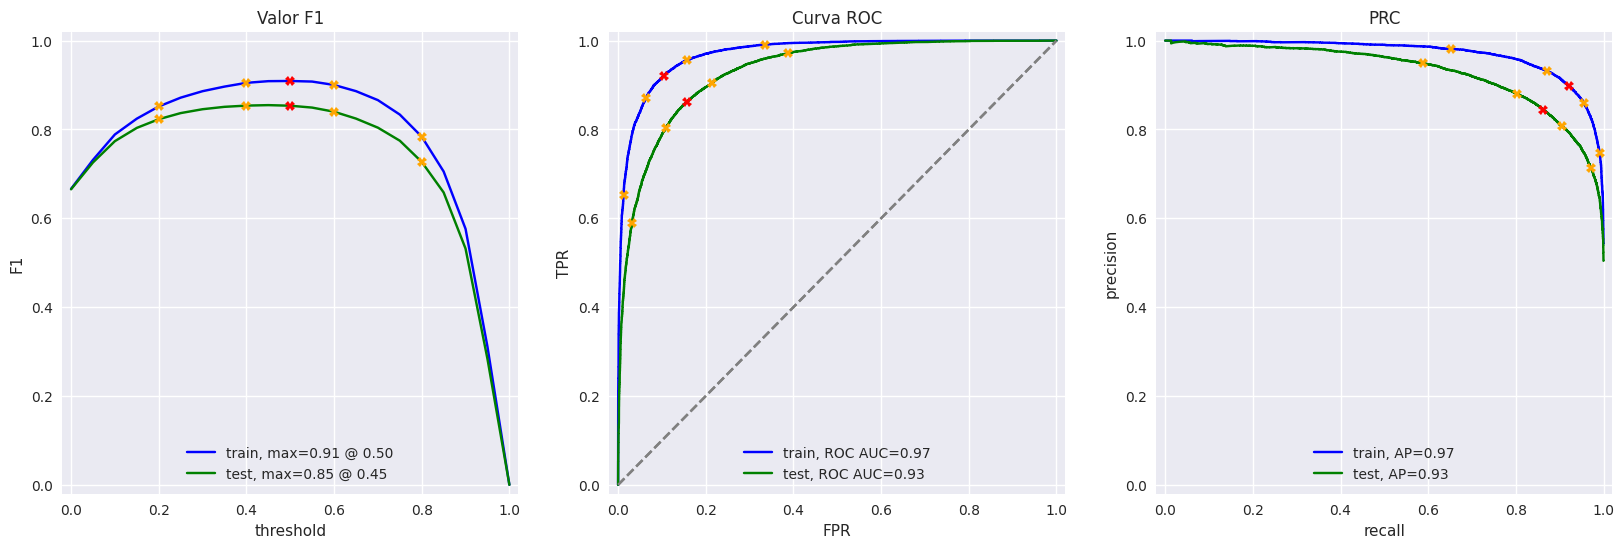

In [37]:
# Modelo 4 - spaCy, TF-IDF ya hecho, y LGBM
model_4 = LGBMClassifier(random_state=42)
model_4.fit(train_features_3, train_target)

# Evaluación
evaluate_model(model_4, train_features_3, train_target, test_features_3, test_target)

Finalmente, este modelo 4 cumple con el F1 mínimo requerido. En este caso, el F1 es de 0.91, 0.02 menos que el del modelo 3 en la parte de train, pero generaliza correctamente, ya que en la parte de test se obtiene un F1 de 0.85. Este modelo es la peor opcion, pues igual que el modelo 3, tarda mas en entrenar, y es el F1 de calidad menos buena.

###  Modelo 9 - BERT

El modelo BERT no va a ser utilizado debido a que requiere mucha potencial computacional y será muy lento en la CPU para el conjunto de datos completo. Para esto tendría que ejecutarse en GPU, un sistema mucho más potente. 

In [29]:
#import torch
#import transformers

In [30]:
#tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
#config = transformers.BertConfig.from_pretrained('bert-base-uncased')
#model = transformers.BertModel.from_pretrained('bert-base-uncased')

In [31]:
#def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):
    
#    ids_list = []
#    attention_mask_list = []

    # texto al id de relleno de tokens junto con sus máscaras de atención 
       
    # <escribe tu código aquí para crear ids_list y attention_mask_list>
    
#    if force_device is not None:
#        device = torch.device(force_device)
#    else:
#        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
#    model.to(device)
#    if not disable_progress_bar:
#        print(f'Uso del dispositivo {device}.')
    
    # obtener insertados en lotes
    
#    embeddings = []

#    for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
            
#        ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        # <escribe tu código aquí para crear attention_mask_batch
            
#        with torch.no_grad():            
#            model.eval()
#            batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)   
#        embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
        
#    return np.concatenate(embeddings)

In [32]:
# ¡Atención! La ejecución de BERT para miles de textos puede llevar mucho tiempo en la CPU, al menos varias horas
#train_features_9 = BERT_text_to_embeddings(df_reviews_train['review_norm'], force_device='cuda')

In [33]:
#print(df_reviews_train['review_norm'].shape)
#print(train_features_9.shape)
#print(train_target.shape)

In [34]:
# si ya obtuviste los insertados, te recomendamos guardarlos para tenerlos listos si
# np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# y cargar...
# with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']

## Mis reseñas

In [ ]:
# Ejemplos de reseñas

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

"""
my_reviews = pd.DataFrame([
    'Simplemente no me gustó, no es mi tipo de película.',
    'Bueno, estaba aburrido y me quedé dormido a media película.',
    'Estaba realmente fascinada con la película',    
    'Hasta los actores parecían muy viejos y desinteresados, y les pagaron por estar en la película. Qué robo tan desalmado.',
    '¡No esperaba que el relanzamiento fuera tan bueno! Los escritores realmente se preocuparon por el material original',
    'La película tuvo sus altibajos, pero siento que, en general, es una película decente. Sí la volvería a ver',
    'Qué pésimo intento de comedia. Ni una sola broma tiene sentido, todos actúan de forma irritante y ruidosa, ¡ni siquiera a los niños les gustará esto!',
    'Fue muy valiente el lanzamiento en Netflix y realmente aprecio poder seguir viendo episodio tras episodio de este nuevo drama tan emocionante e inteligente.'
], columns=['review'])
"""

my_reviews['review_norm'] = my_reviews['review'].apply(text_preprocessing_3)

my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.","simply like , kind movie ."
1,"Well, I was bored and felt asleep in the middl...",", bored feel asleep middle movie ."
2,I was really fascinated with the movie,fascinated movie
3,Even the actors looked really old and disinter...,"actor look old disinterested , get pay movie ...."
4,I didn't expect the reboot to be so good! Writ...,expect reboot good ! writer care source material
5,"The movie had its upsides and downsides, but I...","movie upside downside , feel like overall dece..."
6,What a rotten attempt at a comedy. Not a singl...,"rotten attempt comedy . single joke land , act..."
7,Launching on Netflix was a brave move & I real...,launch Netflix brave & appreciate able binge e...


### Modelo 1

In [50]:
# Define stopwords (por ejemplo con nltk o usa 'english' directamente si trabajas en inglés)
stop_words = 'english'

# Vectorizador para modelo 1
tfidf_vectorizer_2 = TfidfVectorizer(lowercase=True, stop_words=stop_words)

# Entrenamiento del modelo 1
train_features_2 = tfidf_vectorizer_2.fit_transform(df_reviews_train['review_norm'])  # review_norm = texto limpio con método simple
test_features_2 = tfidf_vectorizer_2.transform(df_reviews_test['review_norm'])

model_1 = LogisticRegression(max_iter=1000, random_state=42)
model_1.fit(train_features_2, train_target)

texts = my_reviews['review_norm']
my_reviews_pred_prob_1 = model_1.predict_proba(tfidf_vectorizer_2.transform(texts))[:, 1]

print("\n Modelo 1 (TF-IDF básico + LR):")
for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob_1[i]:.2f}: {review}')


 Modelo 1 (TF-IDF básico + LR):
0.12: simply like , kind movie .
0.12: , bored feel asleep middle movie .
0.56: fascinated movie
0.24: actor look old disinterested , get pay movie . soulless cash grab .
0.31: expect reboot good ! writer care source material
0.46: movie upside downside , feel like overall decent flick . go .
0.02: rotten attempt comedy . single joke land , act annoying loud , kid will like !
0.87: launch Netflix brave & appreciate able binge episode episode , exciting intelligent new drama .


### Modelo 3

In [53]:
# Vectorizador para modelo 3 (sin pasarle stopwords porque ya se eliminan en la función de spaCy)
tfidf_vectorizer_3 = TfidfVectorizer()

# Entrenamiento del modelo 3
train_features_3 = tfidf_vectorizer_3.fit_transform(df_reviews_train['review_norm_3'])  # texto lematizado con spaCy
test_features_3 = tfidf_vectorizer_3.transform(df_reviews_test['review_norm_3'])

model_3 = LogisticRegression(max_iter=1000, random_state=42)
model_3.fit(train_features_3, train_target)

texts = my_reviews['review_norm']

my_reviews_pred_prob = model_3.predict_proba(tfidf_vectorizer_3.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.16:  simply like , kind movie .
0.08:  , bored feel asleep middle movie .
0.50:  fascinated movie
0.18:  actor look old disinterested , get pay movie . soulless cash grab .
0.23:  expect reboot good ! writer care source material
0.43:  movie upside downside , feel like overall decent flick . go .
0.02:  rotten attempt comedy . single joke land , act annoying loud , kid will like !
0.90:  launch Netflix brave & appreciate able binge episode episode , exciting intelligent new drama .


### Modelo 4

In [58]:
model_4 = LGBMClassifier(random_state=42)
model_4.fit(train_features_3, train_target)

texts = my_reviews['review_norm']

tfidf_vectorizer_4 = tfidf_vectorizer_3
my_reviews_pred_prob = model_4.predict_proba(tfidf_vectorizer_4.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.56:  simply like , kind movie .
0.26:  , bored feel asleep middle movie .
0.57:  fascinated movie
0.36:  actor look old disinterested , get pay movie . soulless cash grab .
0.61:  expect reboot good ! writer care source material
0.55:  movie upside downside , feel like overall decent flick . go .
0.26:  rotten attempt comedy . single joke land , act annoying loud , kid will like !
0.75:  launch Netflix brave & appreciate able binge episode episode , exciting intelligent new drama .


### Modelo 9

In [ ]:
# texts = my_reviews['review_norm']

# my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

# my_reviews_pred_prob = model_9.predict_proba(my_reviews_features_9)[:, 1]

# for i, review in enumerate(texts.str.slice(0, 100)):
#    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

## Conclusiones

- El método Bert no se realizó debido a que necesita una potencia muy alta.
- Los modelos 1, 3 y 4 cumplieron con el F1 mínimo requerido. El 1 y el 3 son mejores opciones porque tienen el F1 de 0.88 ambos. La diferencia es que el entrenamiento del 1 fue más rápido, pues NLTK es más rápido, pero más simple.
- El modelo pudo predecir si la opinión de las películas de los usuarios es negativa o positiva. 